# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

/var/folders/37/syd06lrd6cnfc3r_hdklfskh0000gn/T/ipykernel_37941/3997190965.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
#renaming col names
df.rename({
    'GRADES_PK_G':'PREK_NUM',
    'GRADES_KG_G':'KINDER_NUM',
    'GRADES_4_G':'4TH_G_NUM',
    'GRADES_8_G':'8TH_G_NUM',
    'GRADES_12_G':'12TH_G_NUM',
    'GRADES_1_8_G':'PRIMARY_1TO8_NUM',
    'GRADES_9_12_G':'HS_9TO12_NUM',
    'GRADES_ALL_G':'ALL_G_TOTAL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [4]:
#checking out the cols
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'PREK_NUM', 'KINDER_NUM', '4TH_G_NUM',
       '8TH_G_NUM', '12TH_G_NUM', 'PRIMARY_1TO8_NUM', 'HS_9TO12_NUM',
       'ALL_G_TOTAL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [6]:
#checking for missing data in each col
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
PREK_NUM                         173
KINDER_NUM                        83
4TH_G_NUM                         83
8TH_G_NUM                         83
12TH_G_NUM                        83
PRIMARY_1TO8_NUM                 695
HS_9TO12_NUM                     644
ALL_G_TOTAL                       83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [7]:
#removing rows with at least 1 NaN
df.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,4TH_G_NUM,8TH_G_NUM,12TH_G_NUM,PRIMARY_1TO8_NUM,HS_9TO12_NUM,ALL_G_TOTAL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

In [8]:
#removing rows with missing 8th grade Math scores
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

How many years of data are logged in our dataset? 

In [10]:
df['YEAR'].nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

Text(0.5, 1.0, 'Average 8th Grade Math Score Over Time for Michigan and Ohio')

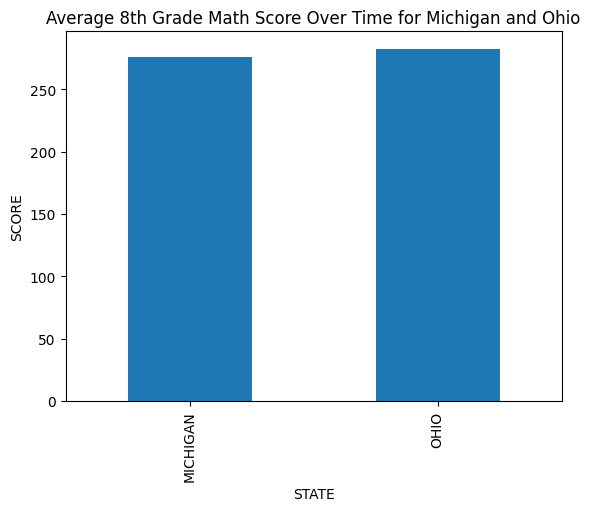

In [19]:
mi_ohio = df[df['STATE'].isin(['MICHIGAN', 'OHIO'])]
avg_scores_mi_ohio = mi_ohio.groupby('STATE')["AVG_MATH_8_SCORE"].mean()
avg_scores_mi_ohio.plot(kind='bar')
plt.xlabel('STATE')
plt.ylabel('SCORE')
plt.title('Average 8th Grade Math Score Over Time for Michigan and Ohio')

Ohio has slightly higher average 8th grade math scores across all years.

Find the average for your chosen test across all states in 2019

In [21]:
df_2019 = df[df['YEAR'] == 2019]
avg_2019 = df_2019['AVG_MATH_8_SCORE'].mean()
print("The average 8th grade Math scores across all states in 2019 was:", avg_2019)

The average 8th grade Math scores across all states in 2019 was: 281.2641509433962


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [22]:
df.groupby('STATE')['AVG_MATH_8_SCORE'].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [26]:
#identifying the two states that have the highest and lowest average 8th grade math scores
avg_scores_by_state = df.groupby('STATE')['AVG_MATH_8_SCORE'].mean()
highest_state = (avg_scores_by_state.idxmax(), avg_scores_by_state.max()) #trying out tuples!
highest_state

('MASSACHUSETTS', 292.3636363636364)

In [27]:
lowest_state = (avg_scores_by_state.idxmin(), avg_scores_by_state.min())
lowest_state

('DISTRICT_OF_COLUMBIA', 251.16666666666666)

In [30]:
#creating a new col 'STATE_EXPEND_PER_STUDENT' to calculate the expedinture per 8th grade student per state
df['STATE_EXPEND_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['8TH_G_NUM']  

Feature engineering justification: **<After the EDA above, I wanted to know the difference in expenditure per student in the states with the highest and lowest average 8th grade math scores. Hypotheis: The availability of funding opens doors to resources that can drastically affect a student's overall academic performance.\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, 'Relationship between Average Math 8 Score and Expenditure per Student')

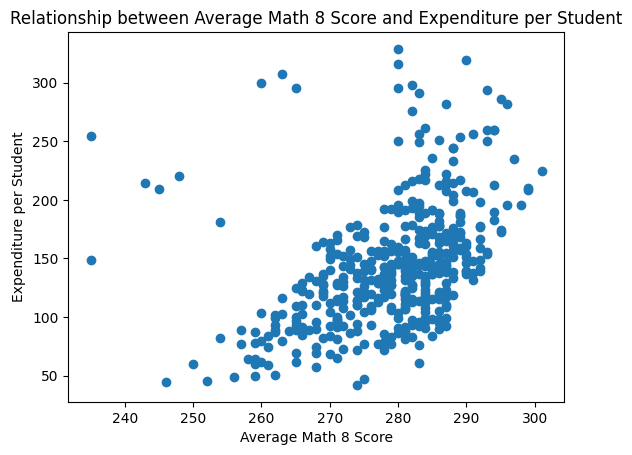

In [33]:
plt.scatter(df['AVG_MATH_8_SCORE'], df['STATE_EXPEND_PER_STUDENT'])
plt.xlabel('Average Math 8 Score')
plt.ylabel('Expenditure per Student')
plt.title('Relationship between Average Math 8 Score and Expenditure per Student')

**<Scatter plot showing the relationship between Average 8th grade Math Scores and Expenditure per Student across states. The majority of data points cluster within these scores (from 260 to 290) and expenditure ranges from 75 to 200, revealing potential trends in the relationship.>**

**Visualization 2**

Text(0.5, 1.0, 'Relationship between Total Expenditure and Expenditure per Student')

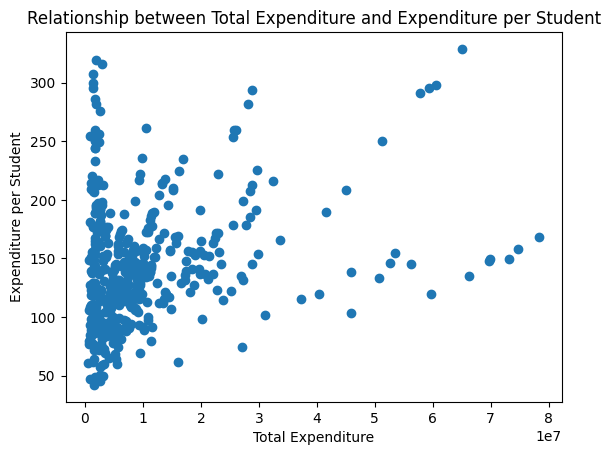

In [34]:
plt.scatter(df['TOTAL_EXPENDITURE'], df['STATE_EXPEND_PER_STUDENT'])
plt.xlabel('Total Expenditure')
plt.ylabel('Expenditure per Student')
plt.title('Relationship between Total Expenditure and Expenditure per Student')

**<Scatter plot illustrating the relationship between Total Expenditure and Expenditure per Student. Notably, a majority of data points are concentrated on the leftmost side, indicating that several states exhibit lower total expenditure and, consequently, lower expenditure per student. Further exploration is warranted to understand the factors contributing to this concentration.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df[['TOTAL_REVENUE', 'INSTRUCTION_EXPENDITURE', '4TH_G_NUM']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [38]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [39]:
# create your model here
model = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [42]:
#the intercepts and coefficients my model generates
print(model.intercept_)
print(model.coef_)

280.2904743250608
[ 2.11990118e-06 -2.25678927e-06 -1.46962023e-04]


In [43]:
# R^2 value
model.score(X_test, y_test)

0.06534451650061557

In [44]:
# mean error
np.mean(model.predict(X_test)-y_test)

2.051563241675275

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

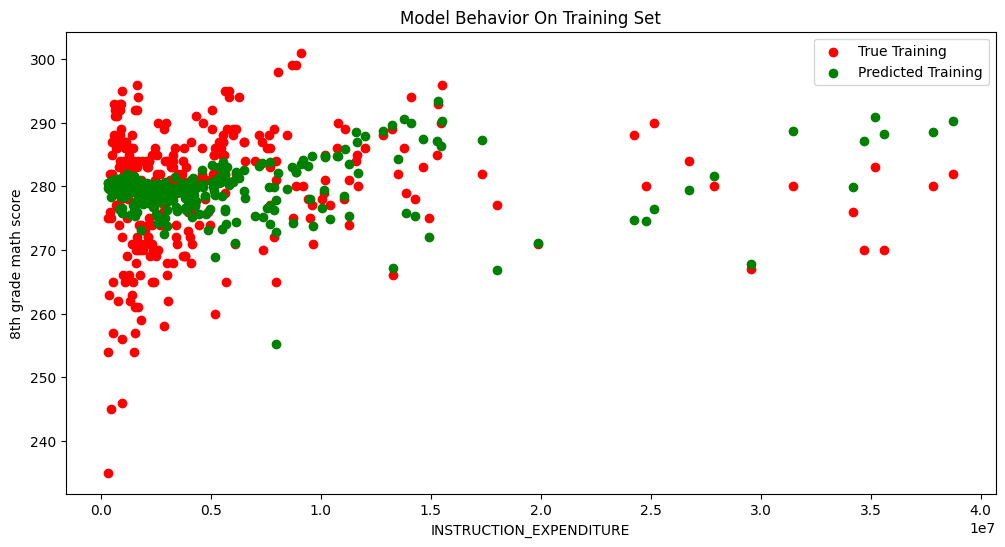

In [45]:
 col_name = 'INSTRUCTION_EXPENDITURE'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_train[col_name], y_train, color = "red")
 plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

 plt.legend(['True Training','Predicted Training'])
 plt.xlabel(col_name)
 plt.ylabel('8th grade math score')
 plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

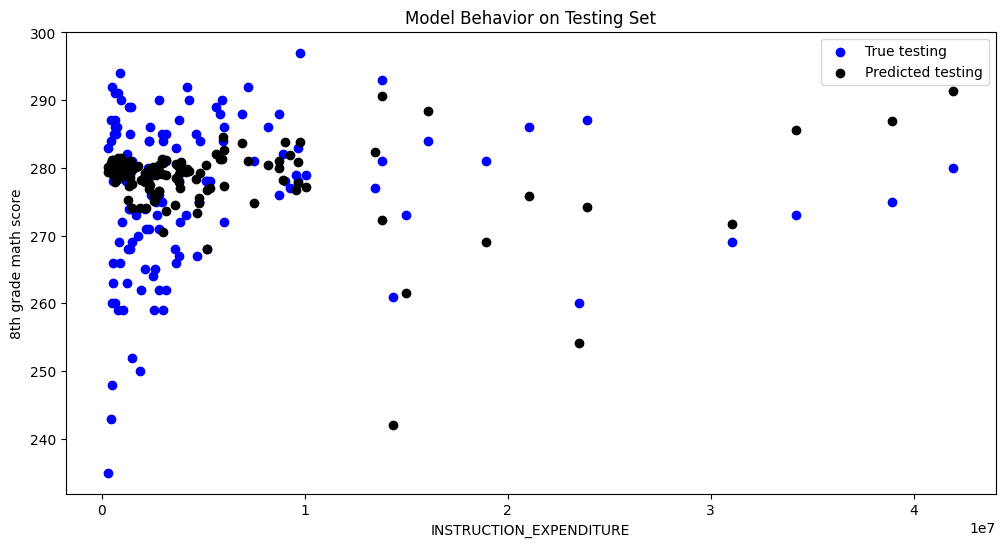

In [46]:
 col_name = 'INSTRUCTION_EXPENDITURE'

 f = plt.figure(figsize=(12,6))
 plt.scatter(X_test[col_name], y_test, color = "blue")
 plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

 plt.legend(['True testing','Predicted testing'])
 plt.xlabel(col_name)
 plt.ylabel('8th grade math score')
 plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<In conclusion, the analysis highlights potential relationships between expenditure and academic performance. However, the linear regression model's limited R-squared value suggests that other factors not included in the model may influence 8th-grade math scores. Further refinement of the model and exploration of additional variables may improve predictive accuracy.\>**